<a href="https://colab.research.google.com/github/paulabhishek7777/Neural-Network-Classification-and-Regression-with-the-examples-of-Hepatits-and-Auto-Mpg-Datasets/blob/main/hepatatis_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hepatitis

In [81]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv("/content/drive/MyDrive/neural network UNP/hepatitis.csv")

In [83]:
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,46,1,2,2,1,1,1,2,1,2,1,1,1,7.6,105,242,3.3,50,2
138,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
139,2,61,1,1,2,1,1,2,1,2,2,1,2,2,0.8,75,20,4.1,61,2
140,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [84]:
df.shape

(142, 20)

In [85]:
df.isnull().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           142 non-null    int64  
 1   age             142 non-null    int64  
 2   sex             142 non-null    int64  
 3   steroid         142 non-null    int64  
 4   antivirals      142 non-null    int64  
 5   fatigue         142 non-null    int64  
 6   malaise         142 non-null    int64  
 7   anorexia        142 non-null    int64  
 8   liver_big       142 non-null    int64  
 9   liver_firm      142 non-null    int64  
 10  spleen_palable  142 non-null    int64  
 11  spiders         142 non-null    int64  
 12  ascites         142 non-null    int64  
 13  varices         142 non-null    int64  
 14  bilirubin       142 non-null    float64
 15  alk_phosphate   142 non-null    int64  
 16  sgot            142 non-null    int64  
 17  albumin         142 non-null    flo

In [87]:
df["class"].unique().sum()

3

In [88]:
df["sex"].unique()

array([2, 1])

In [89]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [90]:
df_0 = df.drop(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
       'ascites', 'varices','histology'], axis = 1)

In [91]:
df_1 = df.drop(["bilirubin","alk_phosphate","sgot","albumin","protime"],axis = 1)

In [92]:
df_1

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,46,1,2,2,1,1,1,2,1,2,1,1,1,2
138,2,44,1,2,2,1,2,2,2,1,2,2,2,2,2
139,2,61,1,1,2,1,1,2,1,2,2,1,2,2,2
140,2,53,2,1,2,1,2,2,2,2,1,1,2,1,2


In [93]:
df_2 = df_1.replace({1:0,2:1})

In [94]:
df_2

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,histology
0,1,30,1,0,1,1,1,1,0,1,1,1,1,1,0
1,1,50,0,0,1,0,1,1,0,1,1,1,1,1,0
2,1,78,0,1,1,0,1,1,1,1,1,1,1,1,0
3,1,34,0,1,1,1,1,1,1,1,1,1,1,1,0
4,1,34,0,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0,46,0,1,1,0,0,0,1,0,1,0,0,0,1
138,1,44,0,1,1,0,1,1,1,0,1,1,1,1,1
139,1,61,0,0,1,0,0,1,0,1,1,0,1,1,1
140,1,53,1,0,1,0,1,1,1,1,0,0,1,0,1


In [95]:
df_3 = df_1.append(df_0,ignore_index = True)

In [96]:
frames =[df_2,df_0]

In [97]:
df_4 =pd.concat(frames, axis =1, ignore_index = False)

In [98]:
df_4

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,histology,bilirubin,alk_phosphate,sgot,albumin,protime
0,1,30,1,0,1,1,1,1,0,1,1,1,1,1,0,1.0,85,18,4.0,61
1,1,50,0,0,1,0,1,1,0,1,1,1,1,1,0,0.9,135,42,3.5,61
2,1,78,0,1,1,0,1,1,1,1,1,1,1,1,0,0.7,96,32,4.0,61
3,1,34,0,1,1,1,1,1,1,1,1,1,1,1,0,1.0,105,200,4.0,61
4,1,34,0,1,1,1,1,1,1,1,1,1,1,1,0,0.9,95,28,4.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0,46,0,1,1,0,0,0,1,0,1,0,0,0,1,7.6,105,242,3.3,50
138,1,44,0,1,1,0,1,1,1,0,1,1,1,1,1,0.9,126,142,4.3,61
139,1,61,0,0,1,0,0,1,0,1,1,0,1,1,1,0.8,75,20,4.1,61
140,1,53,1,0,1,0,1,1,1,1,0,0,1,0,1,1.5,81,19,4.1,48


In [99]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           142 non-null    int64  
 1   age             142 non-null    int64  
 2   sex             142 non-null    int64  
 3   steroid         142 non-null    int64  
 4   antivirals      142 non-null    int64  
 5   fatigue         142 non-null    int64  
 6   malaise         142 non-null    int64  
 7   anorexia        142 non-null    int64  
 8   liver_big       142 non-null    int64  
 9   liver_firm      142 non-null    int64  
 10  spleen_palable  142 non-null    int64  
 11  spiders         142 non-null    int64  
 12  ascites         142 non-null    int64  
 13  varices         142 non-null    int64  
 14  histology       142 non-null    int64  
 15  bilirubin       142 non-null    float64
 16  alk_phosphate   142 non-null    int64  
 17  sgot            142 non-null    int

### Graphs

In [100]:
df_4.rename(columns = {'class':'classi'}, inplace = True)

In [101]:
df_4

,classi,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,histology,bilirubin,alk_phosphate,sgot,albumin,protime
0,1,30,1,0,1,1,1,1,0,1,1,1,1,1,0,1.0,85,18,4.0,61
1,1,50,0,0,1,0,1,1,0,1,1,1,1,1,0,0.9,135,42,3.5,61
2,1,78,0,1,1,0,1,1,1,1,1,1,1,1,0,0.7,96,32,4.0,61
3,1,34,0,1,1,1,1,1,1,1,1,1,1,1,0,1.0,105,200,4.0,61
4,1,34,0,1,1,1,1,1,1,1,1,1,1,1,0,0.9,95,28,4.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0,46,0,1,1,0,0,0,1,0,1,0,0,0,1,7.6,105,242,3.3,50
138,1,44,0,1,1,0,1,1,1,0,1,1,1,1,1,0.9,126,142,4.3,61
139,1,61,0,0,1,0,0,1,0,1,1,0,1,1,1,0.8,75,20,4.1,61
140,1,53,1,0,1,0,1,1,1,1,0,0,1,0,1,1.5,81,19,4.1,48


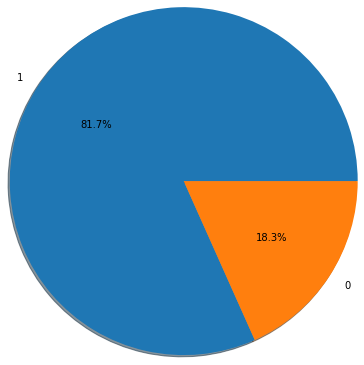

In [102]:
label = df_4.classi.value_counts().index
label_count = df_4.classi.value_counts().values
plt.pie(data=df_4, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=2)
plt.show()

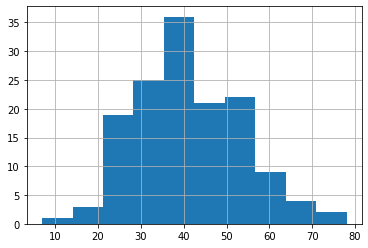

In [103]:
df_4["age"].hist()

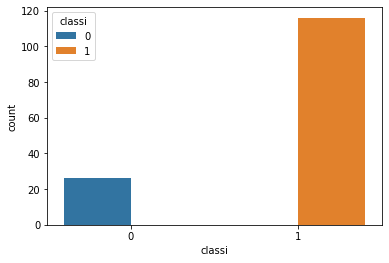

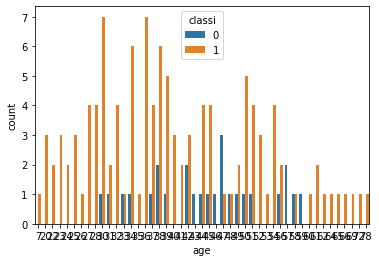

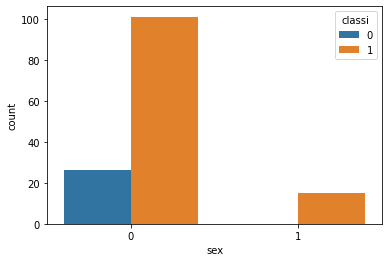

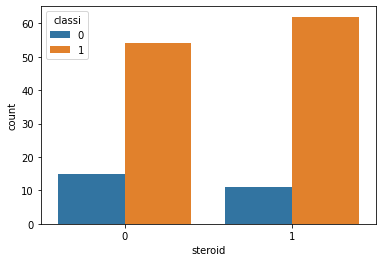

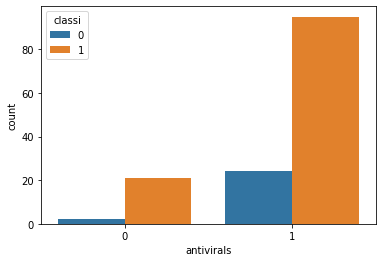

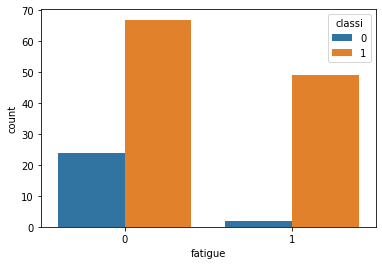

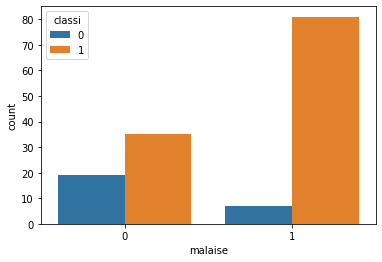

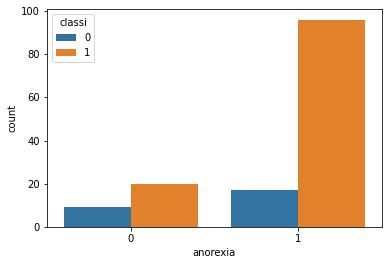

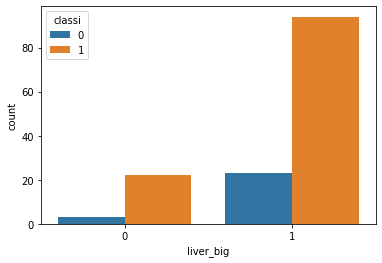

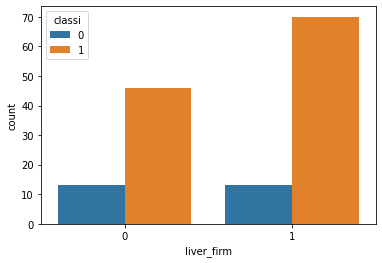

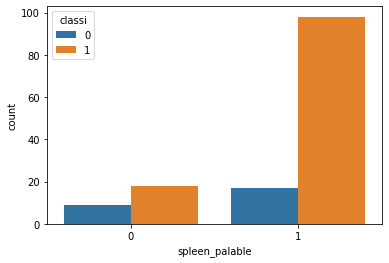

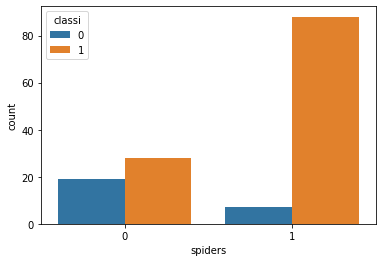

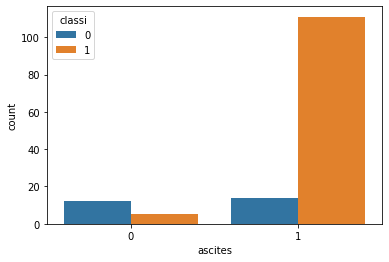

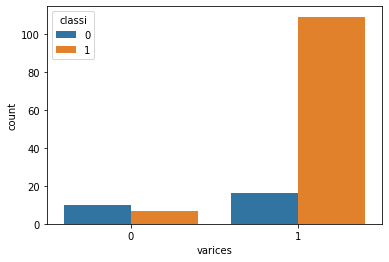

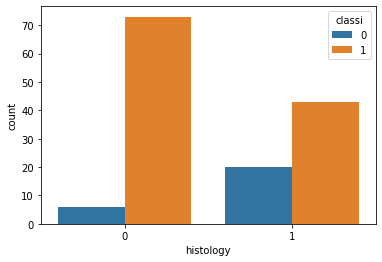

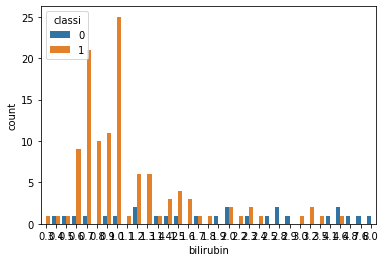

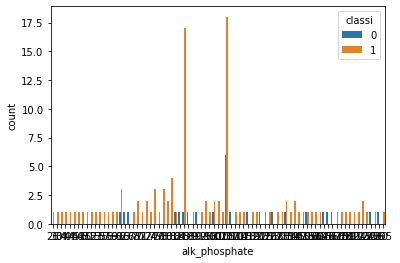

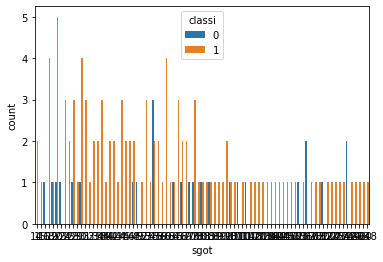

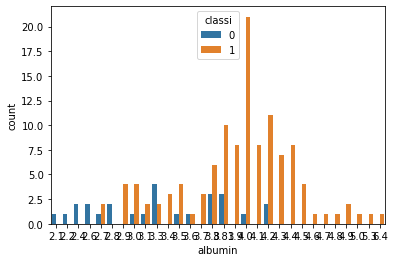

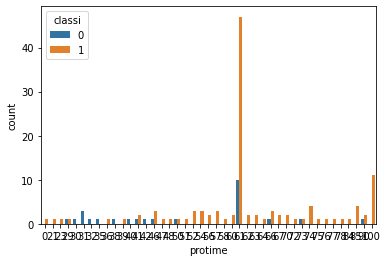

In [104]:
import matplotlib.pyplot as plt


for i, col in enumerate(df_4.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df_4,hue="classi")

## machine learning algorithms 

In [105]:
x = df_4.drop("classi", axis =1)
y = df_4["classi"]

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [107]:
import tensorflow as tf 

In [108]:
tf.random.set_seed(42)

# STEP1: Creating the model

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )




/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [109]:
mod = model.fit(x_train,y_train, epochs  = 100 )

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 3.4724 - accuracy: 0.5664 - precision: 0.8154 - a=recall: 0.5889
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.8308 - accuracy: 0.7257 - precision: 0.8172 - a=recall: 0.8444
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.6558 - accuracy: 0.7965 - precision: 0.7965 - a=recall: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1517 - accuracy: 0.7611 - precision: 0.7944 - a=recall: 0.9444
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9258 - accuracy: 0.6372 - precision: 0.8101 - a=recall: 0.7111
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6034 - accuracy: 0.7699 - precision: 0.8478 - a=recall: 0.8667
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.7965 - precision: 0.7965 - a=recall: 1.0000
Epoch 8/100
4/4 [==============================]

In [110]:
tf.random.set_seed(42)

# STEP1: Creating the model

kit = tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

kit.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
              ]
              )



/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [111]:
kite  =  kit.fit(x_train,y_train, epochs = 20)

Epoch 1/20
4/4 [==============================] - 1s 3ms/step - loss: 3.4724 - accuracy: 0.5664
Epoch 2/20
4/4 [==============================] - 0s 3ms/step - loss: 1.8308 - accuracy: 0.7257
Epoch 3/20
4/4 [==============================] - 0s 3ms/step - loss: 1.6558 - accuracy: 0.7965
Epoch 4/20
4/4 [==============================] - 0s 3ms/step - loss: 1.1517 - accuracy: 0.7611
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 0.9258 - accuracy: 0.6372
Epoch 6/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6034 - accuracy: 0.7699
Epoch 7/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.7965
Epoch 8/20
4/4 [==============================] - 0s 3ms/step - loss: 0.5449 - accuracy: 0.7965
Epoch 9/20
4/4 [==============================] - 0s 3ms/step - loss: 0.5674 - accuracy: 0.6549
Epoch 10/20
4/4 [==============================] - 0s 3ms/step - loss: 0.4572 - accuracy: 0.7876
Epoch 11/20
4/4 [======================

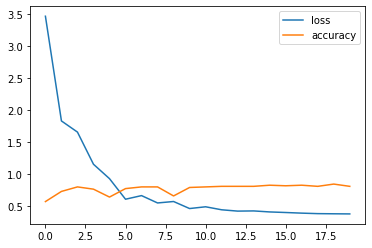

In [112]:
pd.DataFrame(kite.history).plot()

In [113]:
history= model.fit(x_train, y_train, epochs= 200)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2399 - accuracy: 0.8850 - precision: 0.8812 - a=recall: 0.9889
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.9292 - precision: 0.9457 - a=recall: 0.9667
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2324 - accuracy: 0.8850 - precision: 0.9231 - a=recall: 0.9333
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2193 - accuracy: 0.9204 - precision: 0.9263 - a=recall: 0.9778
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2002 - accuracy: 0.9204 - precision: 0.9551 - a=recall: 0.9444
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2322 - accuracy: 0.9115 - precision: 0.9082 - a=recall: 0.9889
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.9115 - precision: 0.9444 - a=recall: 0.9444
Epoch 8/200
4/4 [==============================]

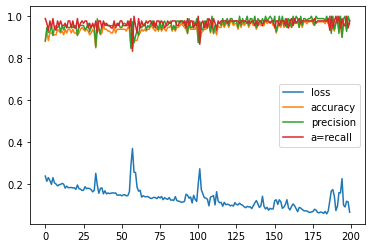

In [114]:
pd.DataFrame(history.history).plot()

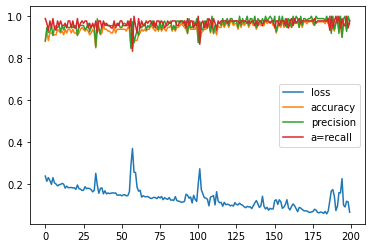

In [115]:
pd.DataFrame(history.history).plot()

## testing cases

In [116]:
import tensorflow as tf 

### Test size 0.2 

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [118]:
tf.random.set_seed(42)

# STEP1: Creating the model

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision')
              ]
              )


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [119]:
mod = model.fit(x_train,y_train, epochs = 100
                )

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 3.4724 - accuracy: 0.5664 - precision: 0.8154
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.8308 - accuracy: 0.7257 - precision: 0.8172
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.6558 - accuracy: 0.7965 - precision: 0.7965
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1517 - accuracy: 0.7611 - precision: 0.7944
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9258 - accuracy: 0.6372 - precision: 0.8101
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6034 - accuracy: 0.7699 - precision: 0.8478
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.7965 - precision: 0.7965
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5449 - accuracy: 0.7965 - precision: 0.7965
Epoch 9/100
4/4 [==============================] - 0s 4ms/step -

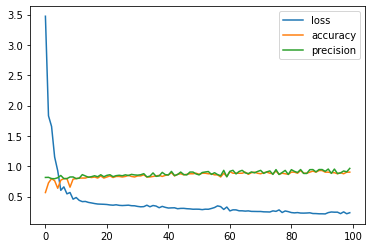

In [120]:
pd.DataFrame(mod.history).plot()

In [121]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 237ms/step - loss: 0.4844 - accuracy: 0.8966 - precision: 0.9600


[0.4844009578227997, 0.8965517282485962, 0.9599999785423279]

In [122]:
tf.random.set_seed(42)

# STEP1: Creating the model

model_S= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model_S.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision')
              ]
              )


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [123]:
mod_S  = model_S.fit(x_train,y_train, epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 3.1975 - accuracy: 0.6372 - precision: 0.7952
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1577 - accuracy: 0.7257 - precision: 0.8105
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7178 - accuracy: 0.7611 - precision: 0.7944
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.7168 - precision: 0.7959
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.6991 - precision: 0.8256
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5905 - accuracy: 0.8053 - precision: 0.8036
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4924 - accuracy: 0.8230 - precision: 0.8302
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4519 - accuracy: 0.8230 - precision: 0.8241
Epoch 9/100
4/4 [==============================] - 0s 3ms/step -

In [124]:
model_S.evaluate(x_test,y_test)

1/1 [==============================] - 0s 218ms/step - loss: 0.3913 - accuracy: 0.8276 - precision: 0.9200


[0.39130789041519165, 0.8275862336158752, 0.9200000166893005]

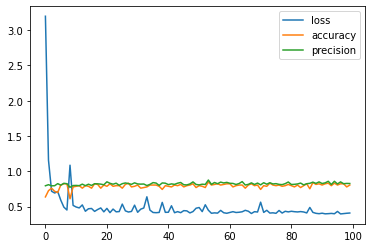

In [125]:
pd.DataFrame(mod_S.history).plot()

### Test_size = 0.25

In [126]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state  =42)

In [127]:
tf.random.set_seed(42)

# STEP1: Creating the model

model_2= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model_2.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision')
              ]
              )

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [128]:
mod_2 = model_2.fit(x_train,y_train, epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 2.9849 - accuracy: 0.6509 - precision: 0.8406
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.8822 - accuracy: 0.7453 - precision: 0.7822
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.4503 - accuracy: 0.7925 - precision: 0.7925
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1122 - accuracy: 0.7170 - precision: 0.8293
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8064 - accuracy: 0.6887 - precision: 0.8400
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6530 - accuracy: 0.7830 - precision: 0.7905
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6131 - accuracy: 0.7925 - precision: 0.7925
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.8019 - precision: 0.8000
Epoch 9/100
4/4 [==============================] - 0s 3ms/step -

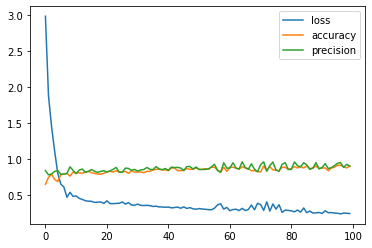

In [129]:
pd.DataFrame(mod_2.history).plot()

In [130]:
model_2.fit(x_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.3962 - accuracy: 0.8889 - precision: 0.9118


In [131]:
tf.random.set_seed(42)

# STEP1: Creating the model

model_2s= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model_2s.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision')
              ]
              )

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [132]:
mod_2s = model_2s.fit(x_train,y_train, epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 2.4779 - accuracy: 0.6981 - precision: 0.8171
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.5440 - accuracy: 0.7075 - precision: 0.7849
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.7571 - accuracy: 0.6038 - precision: 0.7561
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7502 - accuracy: 0.7453 - precision: 0.8065
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9575 - accuracy: 0.7830 - precision: 0.8020
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5553 - accuracy: 0.7830 - precision: 0.8020
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.7830 - precision: 0.8020
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7925 - precision: 0.8039
Epoch 9/100
4/4 [==============================] - 0s 3ms/step -

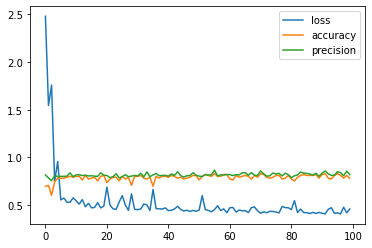

In [133]:
pd.DataFrame(mod_2s.history).plot()

In [134]:
model_2s.evaluate(x_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.4864 - accuracy: 0.8333 - precision: 0.9062


[0.4863636791706085, 0.8333333134651184, 0.90625]

### Test_size  = 0.3

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4, random_state  =42)

In [136]:
tf.random.set_seed(42)

# STEP1: Creating the model

model_3= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model_3.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision')
              ]
              )

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [137]:
mod_3 = model_3.fit(x_train,y_train, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 2.6562 - accuracy: 0.6706 - precision: 0.8421
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7613 - accuracy: 0.7647 - precision: 0.8133
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4950 - accuracy: 0.7765 - precision: 0.7927
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 1.0134 - accuracy: 0.7882 - precision: 0.8025
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7944 - accuracy: 0.7176 - precision: 0.8644
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.7176 - precision: 0.8525
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.7882 - precision: 0.7882
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5675 - accuracy: 0.7882 - precision: 0.7882
Epoch 9/100
3/3 [==============================] - 0s 4ms/step -

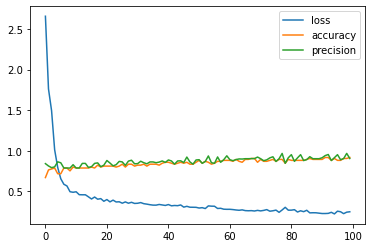

In [138]:
pd.DataFrame(mod_3.history).plot()

In [139]:
model_3.evaluate(x_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.3924 - accuracy: 0.8772 - precision: 0.9038


[0.3923601508140564, 0.8771929740905762, 0.9038461446762085]

In [140]:
tf.random.set_seed(42)

# STEP1: Creating the model

model_3s= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model_3s.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision')
              ]
              )

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [141]:
mod_3s = model_3s.fit(x_train,y_train, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 2.3803 - accuracy: 0.7176 - precision: 0.8413
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.1429 - accuracy: 0.7647 - precision: 0.8310
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 0.8539 - accuracy: 0.6706 - precision: 0.7826
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.1243 - accuracy: 0.6588 - precision: 0.7879
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6543 - accuracy: 0.8000 - precision: 0.8289
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 0.7953 - accuracy: 0.7412 - precision: 0.8261
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.8000 - precision: 0.8125
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 0.8600 - accuracy: 0.6353 - precision: 0.8103
Epoch 9/100
3/3 [==============================] - 0s 4ms/step -

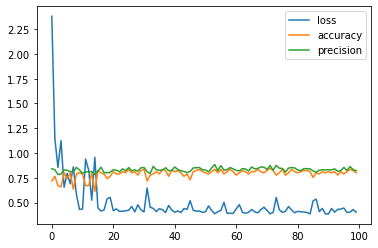

In [142]:
pd.DataFrame(mod_3s.history).plot()

In [143]:
model_3s.evaluate(x_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.4737 - accuracy: 0.7895 - precision: 0.8776


[0.4736913740634918, 0.7894737124443054, 0.8775510191917419]

### test_size = 0.4

In [144]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4, random_state  =42)

In [145]:
tf.random.set_seed(42)

# STEP1: Creating the model

model_4= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model_4.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision')
              ]
              )

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [146]:
mod_4 = model_4.fit(x_train,y_train, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 2.6562 - accuracy: 0.6706 - precision: 0.8421
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7613 - accuracy: 0.7647 - precision: 0.8133
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4950 - accuracy: 0.7765 - precision: 0.7927
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0134 - accuracy: 0.7882 - precision: 0.8025
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7944 - accuracy: 0.7176 - precision: 0.8644
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.7176 - precision: 0.8525
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.7882 - precision: 0.7882
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5675 - accuracy: 0.7882 - precision: 0.7882
Epoch 9/100
3/3 [==============================] - 0s 4ms/step -

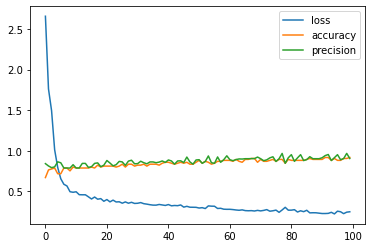

In [147]:
pd.DataFrame(mod_4.history).plot()

In [148]:
model_4.evaluate(x_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.3924 - accuracy: 0.8772 - precision: 0.9038


[0.3923601508140564, 0.8771929740905762, 0.9038461446762085]

In [149]:
tf.random.set_seed(42)

# STEP1: Creating the model

model_4s= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model_4s.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision')
              ]
              )

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [150]:
mod_4s = model_4s.fit(x_train,y_train, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 2.3803 - accuracy: 0.7176 - precision: 0.8413
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.1429 - accuracy: 0.7647 - precision: 0.8310
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8539 - accuracy: 0.6706 - precision: 0.7826
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.1243 - accuracy: 0.6588 - precision: 0.7879
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6543 - accuracy: 0.8000 - precision: 0.8289
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7953 - accuracy: 0.7412 - precision: 0.8261
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.8000 - precision: 0.8125
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8600 - accuracy: 0.6353 - precision: 0.8103
Epoch 9/100
3/3 [==============================] - 0s 3ms/step -

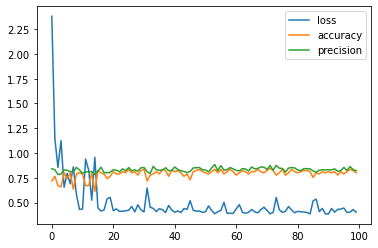

In [151]:
pd.DataFrame(mod_4s.history).plot()

In [152]:
model_4s.evaluate(x_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4737 - accuracy: 0.7895 - precision: 0.8776


[0.4736913740634918, 0.7894737124443054, 0.8775510191917419]

## Experimentation

In [153]:
import tensorflow as tf 

In [154]:
x = df_4.drop("classi", axis =1)
y = df_4["classi"]

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [156]:
tf.random.set_seed(42)

# STEP1: Creating the model

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(6,  activation = 'relu'),
                            tf.keras.layers.Dense(3,  activation = 'relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy')
              ]
              )

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [157]:
history  = model.fit(x_train,y_train,epochs = 400,verbose = 0)

In [158]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.3029 - accuracy: 0.8837


[0.3028610050678253, 0.8837209343910217]

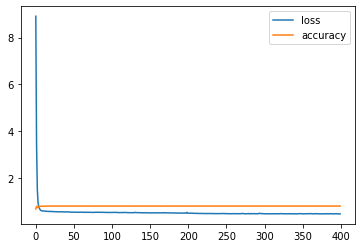

In [159]:
pd.DataFrame(history.history).plot()